In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import pygeostat as gs

In [2]:
sub = xr.open_dataset('../data/netcdfs/banner_lowman_05208_21019-019_21021-007_0006d.nc')

for name, values in sub.items():
    if name != 'dem':
        sub[name] = sub[name].where(sub['dem'] != -10000.0)
sub['dem'] = sub['dem'].where(sub['dem'] != -10000.0)

In [24]:
field = (sub['VV-cor'][100:200,100:200].values)

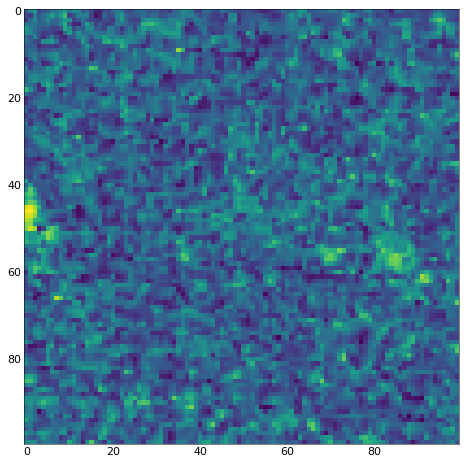

In [25]:
plt.imshow(field)

In [26]:
data = pd.DataFrame(list(np.ndindex(field.shape[0],field.shape[1])), columns = ['x','y'])

In [27]:
def samp_cor(row):
    return field.item((row['x'],row['y']))

In [28]:
data['value'] = data.apply(samp_cor, axis = 1)

In [33]:
for i,r in data.iterrows():
    r.

In [29]:
max_lag = distance.euclidean((data.x.max(),data.y.max()),(data.x.min(),data.x.max()))/2

In [32]:
lags = np.linspace(0,max_lag,20)
for i in range(len(lags)):
    if i != len(lags)-1:
        print(lags[i])
        print(lags[i+1])
    

0.0
2.6052631578947367
2.6052631578947367
5.2105263157894735
5.2105263157894735
7.815789473684211
7.815789473684211
10.421052631578947
10.421052631578947
13.026315789473683
13.026315789473683
15.631578947368421
15.631578947368421
18.236842105263158
18.236842105263158
20.842105263157894
20.842105263157894
23.44736842105263
23.44736842105263
26.052631578947366
26.052631578947366
28.657894736842103
28.657894736842103
31.263157894736842
31.263157894736842
33.868421052631575
33.868421052631575
36.473684210526315
36.473684210526315
39.07894736842105
39.07894736842105
41.68421052631579
41.68421052631579
44.28947368421053
44.28947368421053
46.89473684210526
46.89473684210526
49.5


In [10]:
from scipy.spatial import distance
a = (1, 2, 3)
b = (4, 5, 6)
dst = distance.euclidean(a, b)
dst

5.196152422706632

In [10]:
varcalcdat = gs.ExampleData('experimental_variogram')

In [13]:
varcalcdat

DataFile: /home/zacharykeskinen/anaconda3/envs/uavsar/lib/python3.8/site-packages/pygeostat/data/example_data/varcalc.out
No Special Attributes Found 
Variables:
'Variogram Index', 'Lag Distance', 'Number of Pairs', 'Variogram Value', 'Variogram Number', 'Calculation Azimuth', 'Calculation Dip', 'Variogram Type'

In [14]:
varcalcdat['Variogram Value']

0          NaN
1     0.230234
2     0.460514
3     0.690726
4     0.888928
5     1.077248
6     1.261958
7     1.363072
8     1.364101
9     1.366493
10    1.371180
11    1.378286
12    1.383757
13    1.458456
14    1.325592
15    1.285907
16    1.273984
17         NaN
18    0.009838
19    0.058835
20    0.119594
21    0.190136
22    0.234721
23    0.269752
24    0.406986
25    0.484210
26    0.556366
27    0.666381
28    0.730408
29    0.778520
30    0.870420
31    0.924663
32    0.939600
33    0.984780
Name: Variogram Value, dtype: float64

In [8]:
pygeostat.plotting.variogram_plot(_field)

Error: A distance column could not be found. Ensure its header is one of the following: 'h',
       'Lag Distance', or 'Distance.'


In [37]:
xx,yy = np.mgrid[0:_field.shape[0],0:_field.shape[1]]

In [25]:
V = Variogram(coordinates=coords, values=values, estimator = 'cressie',bin_func = 'uniform', use_nugget = True, n_lags = 30)
print(V)

V.plot()

ValueError: A 2-dimensional array must be passed.